In [445]:
import numpy as np
import matplotlib.pyplot as plt

In [480]:
def init_weights(L, d, hidden_layer_sizes):
    weights = []
    weight_layer = np.random.normal(0, 0.1, (d, hidden_layer_sizes[0]))
    weights.append(weight_layer)

    for l in range(L - 3):
        weight_layer = np.random.normal(0, 0.1, (hidden_layer_sizes[l] + 1, hidden_layer_sizes[l + 1]))
        weights.append(weight_layer)

    weight_layer = np.random.normal(0, 0.1, (hidden_layer_sizes[l + 1] + 1, 1))
    weights.append(weight_layer)

    return weights

In [481]:
def activation(s):
    return np.maximum(0, s)

def derivativeActivation(s):
    return np.where(s > 0, 1, 0)

def outputf(s):
    return 1 / (1 + np.exp(-1 * s))

def derivativeOutput(s):
    return outputf(s) * (1 - outputf(s))

def errorf(x_L, y):
    return np.where(y == 1, -np.log(x_L), -np.log(1 - x_L))

def derivativeError(x_L, y):
    return np.where(y == 1, -1 / x_L, 1 / (1 - x_L))
    
def errorPerSample(X, y_n):
    return errorf(X[-1], y_n)

In [503]:
def forwardPropagation(x, weights):
    retS = []
    retX = [np.array(x)]

    for l in range(len(weights)):
        retS.append(np.atleast_1d(np.dot(np.transpose(weights[l]), retX[l])))

        currX = np.array([1])
        for j in range(len(retS[l])):
            currX = np.append(currX, (activation(retS[l][j]))) if l != len(weights) - 1 else np.array([outputf(retS[l][j])])
        
        retX.append(currX)

    return retX, retS

In [436]:
def backPropagation(X, y_n, s, weights):
    L = len(X)
    delL = []
    g = []
    delL.append(derivativeError(X[L - 1], y_n) * derivativeOutput(s[L - 2]))

    for l in range(L - 2, 0, -1):
        W_hat = weights[l][1:]
        delL.append(np.dot(W_hat, delL[L - l - 2]) * derivativeActivation(s[l - 1]).flatten())
    
    for l in range(L - 1):
        g.append(np.dot(X[l].reshape(-1, 1), delL[L - l - 2].reshape(1, -1)))
        

    return g

In [437]:
def updateWeights(weights, g, alpha):
    nW = []

    for l in range(len(weights)):
        nW.append(weights[l] - alpha * g[l])

    return nW

In [510]:
def pred(x_n, weights):
    retX, _ = forwardPropagation(x_n, weights)
    return 1 if retX[-1] >= 0.5 else -1

def confMatrix(X_test, y_test, w):
    eCount = np.zeros((2, 2))
    row, _ = X_test.shape
    X0 = np.ones((row, 1))
    X_test = np.hstack((X0, X_test))

    for j in range(row):
        if(pred(X_test[j], w) == -1 and y_test[j] == -1):
            eCount[0, 0] += 1
        if(pred(X_test[j], w) == 1 and y_test[j] == -1):
            eCount[0, 1] += 1
        if(pred(X_test[j], w) == 1 and y_test[j] == 1):
            eCount[1, 1] += 1
        if(pred(X_test[j], w) == -1 and y_test[j] == 1):
            eCount[1, 0] += 1

    return eCount

In [506]:
def plotErr(err):
    plt.plot(err, linewidth = 2.0)
    plt.xlabel('Epochs')
    plt.ylabel('Error')

    plt.show()

In [507]:
def train(X_train, y_train, alpha, hidden_layer_sizes, epochs):
    X_train_bias = np.hstack((np.ones((len(X_train), 1)), X_train))
    L = len(hidden_layer_sizes) + 2
    N, d = X_train_bias.shape
    weights = init_weights(L, d, hidden_layer_sizes)

    err = np.zeros((epochs, 1))
    
    for epoch in range(epochs):
        choiceArray = np.arange(0, N)
        np.random.shuffle(choiceArray)
        errN = 0
        for n in range(N):
            index = n#choiceArray[n]
            x = np.transpose(X_train_bias[index])
            y_n = y_train[index]
            X, s = forwardPropagation(x, weights)
            g = backPropagation(X, y_n, s, weights)
            weights = updateWeights(weights, g, alpha)
            errN += errorPerSample(X, y_n)
            
        
        err[epoch] = errN / N
    
    return err, weights

In [467]:
X = [
    [6.9, 3.1, 4.9, 1.5],
    [6.3, 2.7, 4.9, 1.8],
    [6.5, 3.0, 5.2, 2.0],
    [6.8, 3.0, 5.5, 2.1],
    [5.6, 2.5, 3.9, 1.1],
    [6.0, 3.4, 4.5, 1.6],
    [6.7, 3.3, 5.7, 2.5],
    [6.7, 3.0, 5.0, 1.7],
    [5.7, 2.9, 4.2, 1.3],
    [5.6, 3.0, 4.1, 1.3],
    [7.7, 3.8, 6.7, 2.2],
    [5.9, 3.0, 5.1, 1.8],
    [6.5, 3.0, 5.8, 2.2],
    [6.7, 3.0, 5.2, 2.3],
    [6.0, 3.0, 4.8, 1.8],
    [5.5, 2.6, 4.4, 1.2],
    [5.1, 2.5, 3.0, 1.1],
    [7.2, 3.6, 6.1, 2.5],
    [6.1, 2.8, 4.7, 1.2],
    [5.4, 3.0, 4.5, 1.5],
    [6.3, 3.4, 5.6, 2.4],
    [6.3, 2.9, 5.6, 1.8],
    [6.1, 3.0, 4.9, 1.8],
    [6.7, 3.1, 4.4, 1.4],
    [6.3, 2.8, 5.1, 1.5],
    [6.1, 3.0, 4.6, 1.4],
    [5.7, 3.0, 4.2, 1.2],
    [6.9, 3.1, 5.1, 2.3],
    [6.8, 2.8, 4.8, 1.4],
    [6.2, 3.4, 5.4, 2.3],
    [5.0, 2.3, 3.3, 1.0],
    [7.6, 3.0, 6.6, 2.1],
    [6.4, 2.9, 4.3, 1.3],
    [6.5, 2.8, 4.6, 1.5],
    [6.7, 2.5, 5.8, 1.8],
    [5.7, 2.8, 4.1, 1.3],
    [6.1, 2.8, 4.0, 1.3],
    [6.4, 3.1, 5.5, 1.8],
    [5.5, 2.3, 4.0, 1.3],
    [6.7, 3.3, 5.7, 2.1],
    [5.5, 2.4, 3.8, 1.1],
    [6.5, 3.0, 5.5, 1.8],
    [6.9, 3.2, 5.7, 2.3],
    [5.8, 2.6, 4.0, 1.2],
    [6.2, 2.9, 4.3, 1.3],
    [6.9, 3.1, 5.4, 2.1],
    [6.6, 2.9, 4.6, 1.3],
    [6.5, 3.2, 5.1, 2.0],
    [7.0, 3.2, 4.7, 1.4],
    [6.7, 3.1, 5.6, 2.4],
    [7.3, 2.9, 6.3, 1.8],
    [6.3, 2.5, 4.9, 1.5],
    [6.4, 2.7, 5.3, 1.9],
    [5.7, 2.5, 5.0, 2.0],
    [4.9, 2.4, 3.3, 1.0],
    [6.3, 2.5, 5.0, 1.9],
    [6.1, 2.9, 4.7, 1.4],
    [7.7, 2.6, 6.9, 2.3],
    [7.7, 3.0, 6.1, 2.3],
    [5.6, 2.9, 3.6, 1.3],
    [5.7, 2.6, 3.5, 1.0],
    [6.0, 2.9, 4.5, 1.5],
    [5.9, 3.0, 4.2, 1.5],
    [6.2, 2.2, 4.5, 1.5],
    [5.9, 3.2, 4.8, 1.8],
    [6.3, 3.3, 6.0, 2.5],
    [6.6, 3.0, 4.4, 1.4],
    [6.3, 3.3, 4.7, 1.6],
    [5.6, 2.8, 4.9, 2.0],
    [6.2, 2.8, 4.8, 1.8],
    [6.4, 3.2, 4.5, 1.5],
    [5.6, 3.0, 4.5, 1.5],
    [5.8, 2.8, 5.1, 2.4],
    [7.2, 3.0, 5.8, 1.6],
    [5.7, 2.8, 4.5, 1.3],
    [7.2, 3.2, 6.0, 1.8],
    [5.2, 2.7, 3.9, 1.4],
    [7.7, 2.8, 6.7, 2.0],
    [6.0, 2.2, 4.0, 1.0],
    [6.3, 2.3, 4.4, 1.3],
    [7.4, 2.8, 6.1, 1.9],
    [6.1, 2.6, 5.6, 1.4],
    [6.0, 2.7, 5.1, 1.6],
    [7.9, 3.8, 6.4, 2.0],
    [6.8, 3.2, 5.9, 2.3],
    [5.8, 2.7, 4.1, 1.0],
    [6.7, 3.1, 4.7, 1.5],
    [6.4, 2.8, 5.6, 2.2],
    [6.0, 2.2, 5.0, 1.5],
    [6.4, 3.2, 5.3, 2.3],
    [5.8, 2.7, 5.1, 1.9],
    [5.5, 2.5, 4.0, 1.3],
    [4.9, 2.5, 4.5, 1.7],
    [7.1, 3.0, 5.9, 2.1],
    [5.8, 2.7, 5.1, 1.9],
    [5.8, 2.7, 3.9, 1.2],
    [5.5, 2.4, 3.7, 1.0],
    [5.6, 2.7, 4.2, 1.3],
    [6.4, 2.8, 5.6, 2.1],
    [5.0, 2.0, 3.5, 1.0]
]
y = [-1, 1, 1, 1, -1, -1, 1, -1, -1, -1,
     1, 1, 1, 1, 1, -1, -1, 1, -1, -1,
     1, 1, 1, -1, 1, -1, -1, 1, -1, 1,
     -1, 1, -1, -1, 1, -1, -1, 1, -1, 1,
     -1, 1, 1, -1, -1, 1, -1, 1, -1, 1,
     1, -1, 1, 1, -1, 1, -1, 1, 1, -1,
     -1, -1, -1, -1, -1, 1, -1, -1, 1, 1,
     -1, -1, 1, 1, -1, 1, -1, 1, -1, -1,
     1, 1, -1, 1, 1, -1, -1, 1, 1, 1,
     1, -1, 1, 1, 1, -1, -1, -1, 1, -1
]

In [508]:
split = 80

X_train = np.array(X[:split])
y_train = np.array(y[:split])
X_test = np.array(X[split:])
y_test = np.array(y[split:])

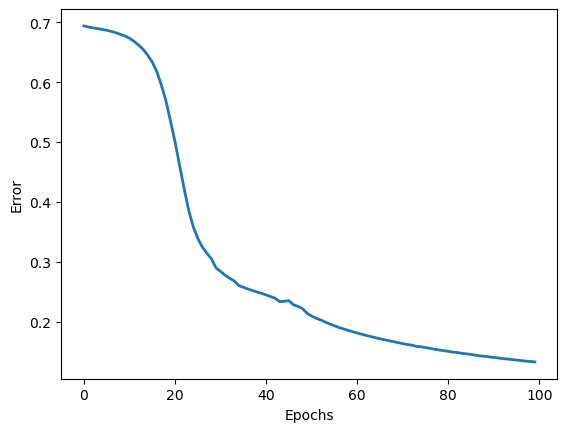

[[ 7.  1.]
 [ 0. 12.]]


In [509]:
alpha = 1e-2
hidden_layer_sizes = [30, 10]
num_epochs = 100


err, weights = train(X_train, y_train, alpha, hidden_layer_sizes, num_epochs)
plotErr(err)
cm = confMatrix(X_test, y_test, weights)
print(cm)